# Lab-04: Dealing with Natural Language

In this lab, you will learn and gain hands-on experience on the use of the nltk
library and some concepts in natural language processing (NLP).

Follow the instruction and run the code cells. Make sure you understand what happens in every stage. <br>

<b>Helpful Links:</b>

  https://www.nltk.org/

Some components of this lab are adapted from: https://realpython.com/nltk-nlp-python/



## Introduction to NLTK

NLTK is a comprehensive Python library for working with natural language content. Here we are making all the necessary imports.


In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas as pd
import numpy as np

#Progress bar
from tqdm import tqdm

#Counter
from collections import Counter

# Machine Learning
import sklearn.metrics as metrics

#Operation
import operator

#Natural Language Processing Packages
import re
import nltk

## Download Resources
# nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download('punkt')

from nltk.tokenize import word_tokenize, wordpunct_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from IPython.display import display

%pip install svgling

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.2 MB/s eta 0:00:00


### Tokenization

Tokenization is the process of splitting a string into substrings. NLTK provides various methods and levels at which you can tokenize.

More information: https://www.nltk.org/api/nltk.tokenize.html


#### Word Tokenization

There are different approaches to splitting a block of text into word tokens which we will explore here.

The first method uses a Punkt sentence tokenization model to inteliigently find words and punctuation in a string. The second method uses a simpler RegEx-based approach to split on whitespace and punctuation. Things like urls and email addresses are tokenized as a single token with Punkt, but split up into separate tokens with RegEx.



In [2]:
example_text = '''
The students at the University of Toronto understood the assignment.
Understanding the lab was crucial to ensure understanding the assigned work.
They quickly discovered many interesting discoveries during the work.
The universal policy was not accepted and can be found at www.utoronto.ca.
'''

print(example_text)

# punkt tokenized
punkt_tokenized = word_tokenize(example_text)
print("Punkt:", punkt_tokenized)

# regex tokenized
regex_tokenized = wordpunct_tokenize(example_text)
print("RegEx:", regex_tokenized)

# print differences
print("\nDifferences between Punkt and RegEx tokenization:")
print("Punkt:", punkt_tokenized[-2:-1])
print("RegEx:", regex_tokenized[-6:-1])



The students at the University of Toronto understood the assignment.
Understanding the lab was crucial to ensure understanding the assigned work.
They quickly discovered many interesting discoveries during the work.
The universal policy was not accepted and can be found at www.utoronto.ca.

Punkt: ['The', 'students', 'at', 'the', 'University', 'of', 'Toronto', 'understood', 'the', 'assignment', '.', 'Understanding', 'the', 'lab', 'was', 'crucial', 'to', 'ensure', 'understanding', 'the', 'assigned', 'work', '.', 'They', 'quickly', 'discovered', 'many', 'interesting', 'discoveries', 'during', 'the', 'work', '.', 'The', 'universal', 'policy', 'was', 'not', 'accepted', 'and', 'can', 'be', 'found', 'at', 'www.utoronto.ca', '.']
RegEx: ['The', 'students', 'at', 'the', 'University', 'of', 'Toronto', 'understood', 'the', 'assignment', '.', 'Understanding', 'the', 'lab', 'was', 'crucial', 'to', 'ensure', 'understanding', 'the', 'assigned', 'work', '.', 'They', 'quickly', 'discovered', 'many', 

#### Sentence Tokenization

Sentence tokenization is the process of splitting text into sentences. We remove extra newline characters ("\n") at the start or end of the sentence using the `.strip()` function.



In [3]:
sent_tokenized = sent_tokenize(example_text)
# clean new lines
sent_tokenized = [sent.strip() for sent in sent_tokenized]
sent_tokenized

['The students at the University of Toronto understood the assignment.',
 'Understanding the lab was crucial to ensure understanding the assigned work.',
 'They quickly discovered many interesting discoveries during the work.',
 'The universal policy was not accepted and can be found at www.utoronto.ca.']

### Preprocessing

Before we can deal with text data, we need to clean the data.

#### Stopword Removal

Text data often contains stopwords (like "a", "the", "and") that we want to remove since they don't carry much meaning. We can use NLTK to do this.

In [4]:
stop_words = set(stopwords.words("english"))

print(stop_words)

{'and', 'further', 'when', 'm', 'ain', 'where', 'himself', 'aren', 'below', 'than', 'whom', 'needn', 'your', 'been', 'because', 'into', 'then', 'wasn', 'doing', 'own', 'did', 'should', "needn't", 'their', 'is', 'through', 'itself', 'on', 'other', 'mustn', "you'll", 'the', 'all', 'what', 'she', "mightn't", 'between', 'it', 'out', 'wouldn', 'my', 'more', 'such', 'here', 'both', 'me', 'again', 'o', 'yours', 'its', 'her', 'or', "won't", 'you', 'hers', 'll', 'theirs', "it's", 'was', 'herself', 'do', 'now', 'haven', "she's", 'had', "didn't", 'who', "you'd", 'shouldn', 'am', 'yourselves', 'themselves', 'd', 'few', 'by', 'against', 'same', 'to', "isn't", 'having', "you've", "you're", 'ma', 'so', 'a', 'are', 'our', 'didn', 'this', 're', 'only', 'i', "haven't", 'some', 'isn', 'they', 't', 've', 'up', 'any', "shan't", 'which', 'those', 'his', 'but', 'in', 'that', "should've", 'ours', 'them', 'yourself', 'just', 'above', "mustn't", 'won', 'before', 's', 'how', 'while', 'being', 'until', 'be', 'abo

Do you see any issues with some of these words?

"i" and "not" are also stopwords. Removing these can change the meaning of the sentence, as seen below.

In [5]:
example_cleaned = []

for word in punkt_tokenized:
  if word.lower() not in stop_words:
    example_cleaned.append(word)

print(example_cleaned)

['students', 'University', 'Toronto', 'understood', 'assignment', '.', 'Understanding', 'lab', 'crucial', 'ensure', 'understanding', 'assigned', 'work', '.', 'quickly', 'discovered', 'many', 'interesting', 'discoveries', 'work', '.', 'universal', 'policy', 'accepted', 'found', 'www.utoronto.ca', '.']


Let's see the last sentence, before and after stop word removal. The meaning changed from "not accepted" to the opposite!

In [6]:
print("Before:")
print(punkt_tokenized[-13:])

print("After:")
print(example_cleaned[-6:])

Before:
['The', 'universal', 'policy', 'was', 'not', 'accepted', 'and', 'can', 'be', 'found', 'at', 'www.utoronto.ca', '.']
After:
['universal', 'policy', 'accepted', 'found', 'www.utoronto.ca', '.']


#### Stemming

Stemming is the process of extracting the root of a word. We do it because it allows us to extract the basic meaning of the word without worrying about the specific use of the word. We will use NLTK's PorterStemmer to do this.

NLTK has other stemmers you can explore here: https://www.nltk.org/howto/stem.html

In [7]:
stemmer = PorterStemmer()

punkt_example_words = [word.lower() for word in word_tokenize(example_text)]

stemmed_words = []
for word in punkt_example_words:
  stemmed_words.append(stemmer.stem(word))

# display as columns of a df
stemmer_df = pd.DataFrame({'word': punkt_example_words, 'stemmed_word': stemmed_words})
stemmer_df

,word,stemmed_word
0,the,the
1,students,student
2,at,at
3,the,the
4,university,univers
5,of,of
6,toronto,toronto
7,understood,understood
8,the,the
9,assignment,assign


Lets look at a few interesting examples:

In [8]:
stemmer_df[stemmer_df['word'].isin(["discovered", "discoveries", "assignment", "assigned", "university", "universal"])].sort_values(by='word')

,word,stemmed_word
20,assigned,assign
9,assignment,assign
25,discovered,discov
28,discoveries,discoveri
34,universal,univers
4,university,univers


If you notice from the results, some words will be stemmed correctly and some with not.

There are 2 types of errors we can get with stemming:

1.   **Understemming (false negative)**: when words that are supposed to stem to the same word, do not.
2.   **Overstemming (false positive)**: when words that are not related stem to the same word.

**discovered** and **discoveries** stem to different words despite both starting with the same base word (discover). This is an example of understemming.

**university** and **universal** stem to the same word (univers) despite both meaning different things. This is an example of overstemming.







#### Lemmatization
Lemmatization is similar to stemming becuase it extracts the core meaning of a word. However, unlike stemming, lemmatization produces an actual word (rather than just a stem) which carries the core meaning of the original word.

We will use NLTK's WordNetLemmatizer for this.

In [9]:
lemmatizer = WordNetLemmatizer()

lemmatized_words = []
for word in punkt_example_words:
  lemmatized_words.append(lemmatizer.lemmatize(word))

# add to stem df
stemmer_df['lemmatized_word'] = lemmatized_words
stemmer_df

,word,stemmed_word,lemmatized_word
0,the,the,the
1,students,student,student
2,at,at,at
3,the,the,the
4,university,univers,university
5,of,of,of
6,toronto,toronto,toronto
7,understood,understood,understood
8,the,the,the
9,assignment,assign,assignment


Let's look at more examples:

In [10]:
stemmer_df[stemmer_df['word'].isin(["students", "discovered", "discoveries", "assignment", "assigned", "university", "universal"])].sort_values(by='word')

,word,stemmed_word,lemmatized_word
20,assigned,assign,assigned
9,assignment,assign,assignment
25,discovered,discov,discovered
28,discoveries,discoveri,discovery
1,students,student,student
34,universal,univers,universal
4,university,univers,university


### Part-of-Speech (POS) Tagging

There are 8 POS in English:

1. **Noun (NN):** Is a person, place, or thing
2. **Pronoun (PRP):** Replaces a noun
3. **Adjective (JJ):** Gives information about what a noun is like
4. **Verb (VB):** Is an action or a state of being
5. **Adverb (RB):** Gives information about a verb, an adjective, or another adverb
6. **Preposition:** Gives information about how a noun is related to another word in the sentence
7. **Conjunction:** Connects words, phrases, or clauses
8. **Interjection:** Expresses emotion or surprise

NLTK uses the Brown Corpus for POS tagging. You can get more inofrmation about the POS tags in the Brown Corpus here: https://en.wikipedia.org/wiki/Brown_Corpus#Part-of-speech_tags_used

We want to be able to tag tokens in text with one of these 8 POS tags. We will use NLTK's `pos_tag()` function for this.



In [11]:
sample_pos_tags = nltk.pos_tag(punkt_tokenized)
sample_pos_tags

[('The', 'DT'),
 ('students', 'NNS'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('University', 'NNP'),
 ('of', 'IN'),
 ('Toronto', 'NNP'),
 ('understood', 'VBD'),
 ('the', 'DT'),
 ('assignment', 'NN'),
 ('.', '.'),
 ('Understanding', 'VBG'),
 ('the', 'DT'),
 ('lab', 'NN'),
 ('was', 'VBD'),
 ('crucial', 'JJ'),
 ('to', 'TO'),
 ('ensure', 'VB'),
 ('understanding', 'VBG'),
 ('the', 'DT'),
 ('assigned', 'JJ'),
 ('work', 'NN'),
 ('.', '.'),
 ('They', 'PRP'),
 ('quickly', 'RB'),
 ('discovered', 'VBD'),
 ('many', 'JJ'),
 ('interesting', 'JJ'),
 ('discoveries', 'NNS'),
 ('during', 'IN'),
 ('the', 'DT'),
 ('work', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('universal', 'JJ'),
 ('policy', 'NN'),
 ('was', 'VBD'),
 ('not', 'RB'),
 ('accepted', 'VBN'),
 ('and', 'CC'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('found', 'VBN'),
 ('at', 'IN'),
 ('www.utoronto.ca', 'NN'),
 ('.', '.')]

### Chunking

Chunking uses POS tags to group words together.

We will use the sentence tokens here. Notice how punctuation does not have any POS so the tag is the same as the token.

In [12]:
sent_pos_tags = [nltk.pos_tag(word_tokenize(sent)) for sent in sent_tokenized]
sent_pos_tags


[[('The', 'DT'),
  ('students', 'NNS'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('University', 'NNP'),
  ('of', 'IN'),
  ('Toronto', 'NNP'),
  ('understood', 'VBD'),
  ('the', 'DT'),
  ('assignment', 'NN'),
  ('.', '.')],
 [('Understanding', 'VBG'),
  ('the', 'DT'),
  ('lab', 'NN'),
  ('was', 'VBD'),
  ('crucial', 'JJ'),
  ('to', 'TO'),
  ('ensure', 'VB'),
  ('understanding', 'VBG'),
  ('the', 'DT'),
  ('assigned', 'JJ'),
  ('work', 'NN'),
  ('.', '.')],
 [('They', 'PRP'),
  ('quickly', 'RB'),
  ('discovered', 'VBD'),
  ('many', 'JJ'),
  ('interesting', 'JJ'),
  ('discoveries', 'NNS'),
  ('during', 'IN'),
  ('the', 'DT'),
  ('work', 'NN'),
  ('.', '.')],
 [('The', 'DT'),
  ('universal', 'JJ'),
  ('policy', 'NN'),
  ('was', 'VBD'),
  ('not', 'RB'),
  ('accepted', 'VBN'),
  ('and', 'CC'),
  ('can', 'MD'),
  ('be', 'VB'),
  ('found', 'VBN'),
  ('at', 'IN'),
  ('www.utoronto.ca', 'NN'),
  ('.', '.')]]

#### Noun Phrase extraction via RegEx & POS Tags

Using the POS tagging on the first newsgroup email from above and RegEx (regular expression), we will extract noun phrases.

The rule we will use is as follows: `NP: {<DT>?<JJ>*<NN>}`

Breakdown: \\
**NP**: noun phrase \\
**DT**: determiner (ex. "a", "the") \\
**?**: says that DT is optional \\
**JJ**: adjective \\
**\***: there can be any number of adjectives \\
**NN**: noun \\
**+**: match at least 1 noun \\

Some examples of noun phrases: \\
"the fluffy dog", "a large tuna"

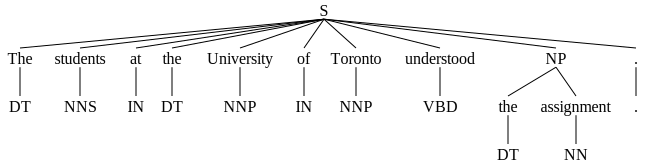

('the', 'assignment')


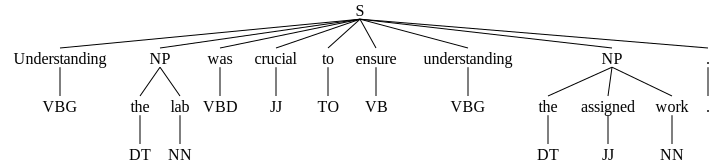

('the', 'lab')
('the', 'assigned', 'work')


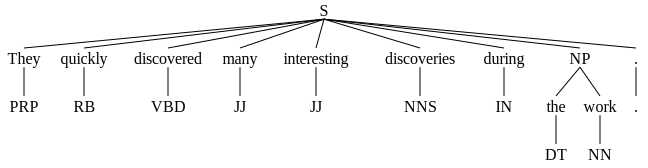

('the', 'work')


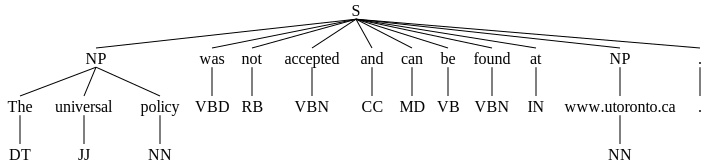

('The', 'universal', 'policy')
('www.utoronto.ca',)


In [13]:
np_grammar = "NP: {<DT>?<JJ>*<NN>+}"
cp = nltk.RegexpParser(np_grammar)
for sent_tags in sent_pos_tags:
  np_chunks = cp.parse(sent_tags)
  display(np_chunks)
  # print NPs
  for subtree in np_chunks.subtrees():
    if subtree.label() == 'NP':
      tokens, pos = zip(*subtree.leaves())
      print(tokens)

This tree visualization shows the text split up by word tokens and identifies which groups of tokens are noun phrases (NP).

### Text Analysis

We will now perform text analysis on the 20 NewsGroups dataset.


#### 20 NewsGroups Dataset

The 20 newsgroups dataset contains ~20,000 newsgroup posts spread across 20 topics and split into training and test sets. We will use the version with the headers removed in order to do text analysis.

More information: http://qwone.com/~jason/20Newsgroups/

In [14]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train', remove='headers')

In [15]:
# load newsgroups_train into pd dataframe
newsgroups_df = pd.DataFrame({'text': newsgroups_train.data, 'target': newsgroups_train.target})

# get targets mapping to topic names
target_names = newsgroups_train.target_names
newsgroups_df['topic'] = newsgroups_df['target'].apply(lambda target: target_names[target])

newsgroups_df.head()

,text,target,topic
0,I was wondering if anyone out there could enl...,7,rec.autos
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space


First, we will tokenize and lowercase all the words in the body.

In [16]:
newsgroups_df['words'] = newsgroups_df['text'].apply(lambda x: nltk.word_tokenize(x))
newsgroups_df['words'] = newsgroups_df['words'].apply(lambda x: [word.lower() for word in x])
newsgroups_df['words'].head()

0    [i, was, wondering, if, anyone, out, there, co...
1    [a, fair, number, of, brave, souls, who, upgra...
2    [well, folks, ,, my, mac, plus, finally, gave,...
3    [robert, j.c., kyanko, (, rob, @, rjck.uucp, )...
4    [from, article, <, c5owcb.n3p, @, world.std.co...
Name: words, dtype: object

Next, we will remove punctuation. The `isalpha()` function is used to determine if text is alphabetical (only contains letters a-z).

More info can be found here: https://www.w3schools.com/python/ref_string_isalpha.asp

In [17]:
# remove punctuation
newsgroups_df['words'] = newsgroups_df['words'].apply(lambda x: [word for word in x if word.isalpha()])
newsgroups_df['words'].head()

0    [i, was, wondering, if, anyone, out, there, co...
1    [a, fair, number, of, brave, souls, who, upgra...
2    [well, folks, my, mac, plus, finally, gave, up...
3    [robert, kyanko, rob, wrote, abraxis, writes, ...
4    [from, article, by, tombaker, tom, a, baker, i...
Name: words, dtype: object

#### Zipf Distribution

Words in text often follow a distribution known as the Zipf distribution.

We will calculate the frequency of words in the 20 NewsGroups dataset and plot it to check the distribution there. We will use Python's Counter library to do this. The Counter class extends a Python dictionary, with the keys being the elements and the values being the count of each element.

The documentation for the Counter class is here: https://docs.python.org/3/library/collections.html#collections.Counter

In [18]:
# get frequency of all words in dataset
token_count_ng = Counter()

for words in newsgroups_df['words']:
  token_count_ng.update(words)

# put the frequency of all words in a dataframe
word_freq_ng = pd.DataFrame.from_dict(token_count_ng, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
word_freq_ng.head()

,frequency
the,144042
to,71794
of,64075
a,61063
and,56309


As we can see, the most common words are stopwords. Now we will plot the distribution. Since there are many email-related tokens with very few occurances, we will display the first portion of the x axis.

<Axes: title={'center': 'Zipf Plot'}, xlabel='Words', ylabel='Frequency'>

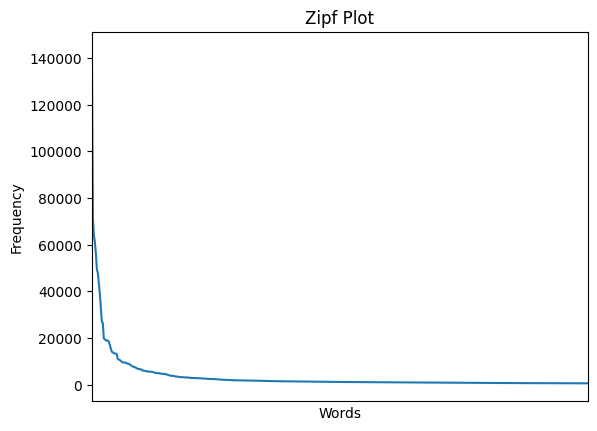

In [19]:
ax = word_freq_ng.plot(legend=False, xlabel='Words', ylabel='Frequency', title="Zipf Plot")
ax.set_xticks([])
ax.set_xlim(0, 500)
ax

This text follows a Zipf distribution, however has a very sharp change when the curve begins to flatten. Let's see what happens when we remove stopwords.

In [20]:
# get frequency of all non stopwords in dataset
token_count_ng_nsp = Counter()

# create no stopwords column
newsgroups_df['words_nsp'] = newsgroups_df['words'].apply(lambda x: [word for word in x if word not in stop_words])

for words in newsgroups_df['words_nsp']:
  token_count_ng_nsp.update(words)

# put the frequency of all words in a dataframe
word_freq_ng_nsp = pd.DataFrame.from_dict(token_count_ng_nsp, orient='index', columns=['frequency']).sort_values(by='frequency', ascending=False)
word_freq_ng_nsp.head()

,frequency
would,9465
one,8756
writes,7840
article,6742
x,6008


<Axes: title={'center': 'Zipf Plot (no stopwords)'}, xlabel='Words', ylabel='Frequency'>

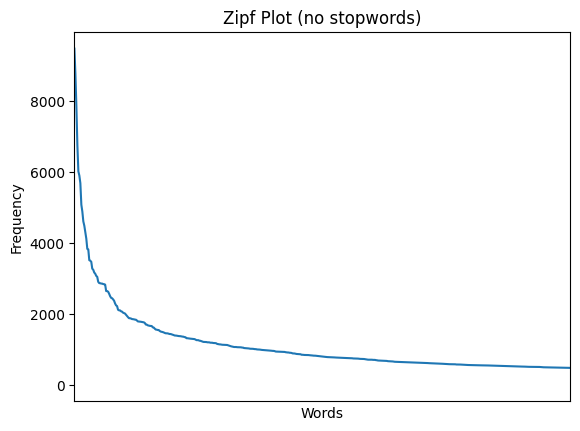

In [21]:
ax = word_freq_ng_nsp.plot(legend=False, xlabel='Words', ylabel='Frequency', title="Zipf Plot (no stopwords)")
ax.set_xticks([])
ax.set_xlim(0, 500)
ax

We also see a Zipf distribution here but the curve has a smoother/slower flattening. Why is this? Many of the very frequent words are stopwords, so the words with the highest frequency in this case are less frequent.

#### Mutual Information (MI)

Mutual Information (MI) tells us the information that is shared in the non-linear realtionships between tokens and topics. We will calculate the MI of the non-stopwords in the data with the topics. We will use the top 500 most common words (tokens) to do this.

More information: http://www.scholarpedia.org/article/Mutual_information

In [22]:
# Using topk words, we will do mutual information

# get the top 500 words by frequency
word_freq_ng_nsp['word'] = word_freq_ng_nsp.index
topk = [tuple(x) for x in word_freq_ng_nsp.head(500).to_numpy()]

# create a binary list for each row in the dataset to indicate if it contains
# each word in the top 500
freqText = []
for entry in newsgroups_df['words_nsp']:
    tempCounter = Counter(entry)
    topkinText = [1 if tempCounter[word] > 0 else 0 for (wordCount,word) in topk]
    freqText.append(topkinText)


# Turn these lists into a DataFrame
freqTextDf = pd.DataFrame(freqText)
dfName = []
for c in topk:
    dfName.append(c[1])
freqTextDf.columns = dfName

# Merge DataFrame with dataset DataFrame
finalTextDf = newsgroups_df[['text', 'target','topic']].join(freqTextDf)
finalTextDf

,text,target,topic,would,one,writes,article,x,people,like,...,guy,posted,apple,rest,return,league,gets,strong,board,whatever
0,I was wondering if anyone out there could enl...,7,rec.autos,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,A fair number of brave souls who upgraded thei...,4,comp.sys.mac.hardware,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,"well folks, my mac plus finally gave up the gh...",4,comp.sys.mac.hardware,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,Robert J.C. Kyanko (rob@rjck.UUCP) wrote:\n> a...,1,comp.graphics,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,"From article <C5owCB.n3p@world.std.com>, by to...",14,sci.space,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11309,DN> From: nyeda@cnsvax.uwec.edu (David Nye)\nD...,13,sci.med,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,1
11310,"I have a (very old) Mac 512k and a Mac Plus, b...",4,comp.sys.mac.hardware,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11311,I just installed a DX2-66 CPU in a clone mothe...,3,comp.sys.ibm.pc.hardware,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11312,In article <1qkgbuINNs9n@shelley.u.washington....,1,comp.graphics,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# get Top K mutual information terms from the dataframe
def getMI(topk, df, label_column='topic'):
    unique_labels = df[label_column].unique()

    # create a placeholder df
    overallDf = pd.DataFrame()

    # loop through each topic
    for topic in unique_labels:
      miScore = []

      # create a binary column for the current topic
      label_col = df[label_column].copy()
      label_col[label_col != topic] = 0
      label_col[label_col == topic] = 1

      # get the mi score for each word with the current topic
      for word in topk:
          miScore.append([word[1]]+[metrics.mutual_info_score(label_col, df[word[1]])] + [topic])

      # combine the scores of all words for the topic into the df
      miScoredf = pd.DataFrame(miScore).sort_values(1,ascending=0)
      miScoredf.columns = ['Word','MI Score','Topic']
      overallDf = pd.concat([overallDf, miScoredf])

    return overallDf

In [24]:
mi_scores = getMI(topk, finalTextDf)

# show top 5 words for each topic
mi_scores = mi_scores.set_index(['Word']).groupby('Topic')['MI Score'].nlargest(5).reset_index()
mi_scores

,Topic,Word,MI Score
0,alt.atheism,god,0.015212
1,alt.atheism,writes,0.008847
2,alt.atheism,religion,0.007849
3,alt.atheism,say,0.005346
4,alt.atheism,bible,0.004528
...,...,...,...
95,talk.religion.misc,jesus,0.011641
96,talk.religion.misc,god,0.010588
97,talk.religion.misc,christian,0.009122
98,talk.religion.misc,christians,0.008158


Notice here how words like "God" and "religion" have high MI scores for "alt.atheism". This is because they tell us a lot of information about which topic the text is about.

### Extra

This section will be covered in the next lab as well. It is not required for Assignment 4 or the quiz this week.

#### Pointwise Mutual Information (PMI)

PMI is a measure of association between 2 events. In this case, we use it to measure how correlated a specific word in the newsgroup body text is to a topic.

Next, we will calculate PMI to determine the correlation of specific words with each topic.

In [25]:
def demo_pmiCal(df,word):
    pmilist=[]
    N = df.shape[0]

    # go through each topic
    for topic in df['topic'].unique():
        for word_present in [False,True]:

            # calculate probabilities
            px = sum(df['topic']==topic)
            py = sum(df[word]==word_present)
            pxy = len(df[(df['topic']==topic) & (df[word]==word_present)])

            if pxy==0:#Log 0 cannot happen
                pmi = math.log((pxy+0.0001)*N/(px*py))
            else:
                pmi = math.log(pxy*N/(px*py))

            pmilist.append([topic]+[word_present]+[px]+[py]+[pxy]+[pmi])

    # assemble the results into a dataframe
    pmidf = pd.DataFrame(pmilist)
    pmidf.columns = ['topic (x)','word_present (y)','px','py','pxy','pmi']
    pmidf = pmidf.sort_values(by='pmi', ascending=False)
    return pmidf

In [26]:
demo_pmiCal(finalTextDf, "god")

,topic (x),word_present (y),px,py,pxy,pmi
33,soc.religion.christian,True,599,782,334,2.087821
23,alt.atheism,True,480,782,167,1.616149
19,talk.religion.misc,True,377,782,125,1.568010
2,comp.sys.mac.hardware,False,578,10532,576,0.068156
10,sci.med,False,594,10532,591,0.066559
14,comp.os.ms-windows.misc,False,591,10532,588,0.066534
24,sci.electronics,False,591,10532,588,0.066534
38,sci.crypt,False,595,10532,591,0.064877
26,comp.windows.x,False,593,10532,589,0.064854
20,misc.forsale,False,585,10532,580,0.063039


As expected, "God" is highly associated with the topics `soc.religion.christian`, `alt.atheism` and `talk.religion.misc`.